In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)

# Diffuser
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0, 1)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [4]:
n = 2
grover_circuit = QuantumCircuit(n)

In [5]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [6]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [7]:
# Orcale
grover_circuit.cz(0,1)
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [8]:
# Diffuser
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [9]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Math object>

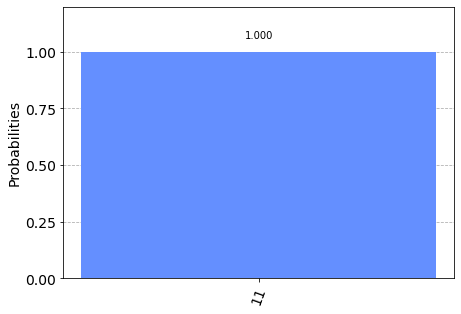

In [10]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [31]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [32]:
# Orcale
grover_circuit.cz(0,2)
grover_circuit.cz(0,1)
grover_circuit.draw()

┌───┐      
q_0: ┤ H ├─■──■─
     ├───┤ │  │ 
q_1: ┤ H ├─┼──■─
     ├───┤ │    
q_2: ┤ H ├─■────
     └───┘

In [33]:
# Diffuser
grover_circuit.h([0, 1, 2])
grover_circuit.x([0, 1, 2])
grover_circuit.cz(0, [1, 2])
grover_circuit.x([0, 1, 2])
grover_circuit.h([0, 1, 2])
grover_circuit.draw()

QiskitError: 'No counts for experiment "0"'

In [16]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

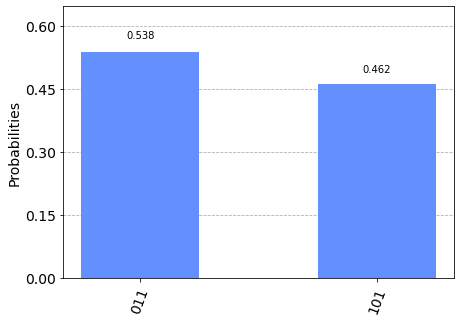

In [51]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [74]:
qc = QuantumCircuit(3)
# qc.z(0)
qc = initialize_s(qc, [0,1,2])


qc.cz(0, 1)
qc.cz(1, 2)
qc.cz(0, 2)
# qc.z(0)
# qc.cz(0, 2)
# qc.z(0)
# qc.z(1)
# qc.z(2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

qc_sim = qc.copy()
qc_sim.save_statevector()
qobj = assemble(qc_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

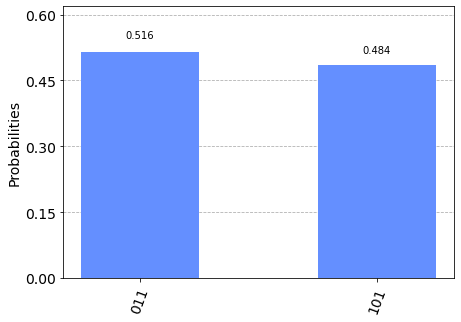

In [70]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
from qiskit_textbook.problems import grover_problem_oracle
## Example Usage
n = 4
oracle = grover_problem_oracle(n, variant=2, print_solutions=True)  # 0th variant of oracle, with n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()

In [23]:
qc = QuantumCircuit(4)
qc.h([0,1])
qc.ccx(0,1,3)
qc.swap(0,1)
qc.swap(0,2)
qc.cx(3,1)
qc.cx(3,2)
qc.x(3)
qc.ccx(1,2,0)
qc.cx(3,0)
qc.x(3)
qc.cx(1,0)
qc.cx(2,0)
qc.measure_all()

qc.draw()



┌───┐                     ┌───┐┌───┐┌───┐┌───┐ ░ ┌─┐         
   q_0: ┤ H ├──■───X──X───────────┤ X ├┤ X ├┤ X ├┤ X ├─░─┤M├─────────
        ├───┤  │   │  │ ┌───┐     └─┬─┘└─┬─┘└─┬─┘└─┬─┘ ░ └╥┘┌─┐      
   q_1: ┤ H ├──■───X──┼─┤ X ├───────■────┼────■────┼───░──╫─┤M├──────
        └───┘  │      │ └─┬─┘┌───┐  │    │         │   ░  ║ └╥┘┌─┐   
   q_2: ───────┼──────X───┼──┤ X ├──■────┼─────────■───░──╫──╫─┤M├───
             ┌─┴─┐        │  └─┬─┘┌───┐  │  ┌───┐      ░  ║  ║ └╥┘┌─┐
   q_3: ─────┤ X ├────────■────■──┤ X ├──■──┤ X ├──────░──╫──╫──╫─┤M├
             └───┘                └───┘     └───┘      ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3

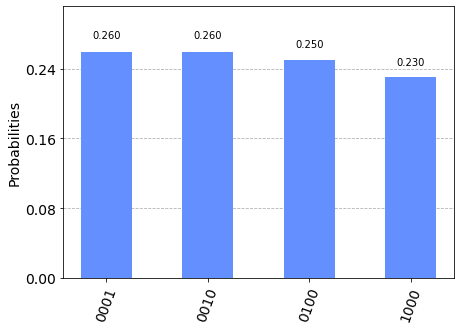

In [24]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)